<span style="font-size:3em;font-weight:500">Стабилизация перевёрнутого маятника с неподвижной осью подвеса</span>

<span style="font-size:2em;font-weight:500">Расчётно-графическая работа для лабораторного практикума. Задания. Часть 1. Линейные и нелинейные стратегии управления</span>

**Автор: В. А. Костин**  

**2025 год**
$\newcommand{\ctg}{\mathop{\mathrm{ctg}}\nolimits}$
$\newcommand{\tg}{\mathop{\mathrm{tg}}\nolimits}$
$\newcommand{\arctg}{\mathop{\mathrm{arctg}}\nolimits}$
$\newcommand{\degree}{^{\circ}}$
$\renewcommand{\Re}{\mathop{\mathrm{Re}}\nolimits}$
$\newcommand{\D}{\mathrm{d}}$

# Задание 1. Инициализация параметров маятника

*Запишите в соответствующие переменные номер группы, фамилию, имя и отчество выполняющего работу.* *После этого запустите на выполнение изменённую ячейку и три следующие ячейки с кодом*. Запустить на выполнение текущую (в которой находится курсов) ячейку можно с помощью сочетания клавиш `Shift` и `Enter` или с помощью кнопки `Run` на панели инструментов. В результате выполнения этих ячеек будут исполнены подготовительные инструкции, подключены необходимые научные пакеты и вспомогательный модуль `control_theory`. Кроме этого будут созданы индивидуальные виртуальные маятники `p1` и `p2` со случайно сгенерированными параметрами (на основе предоставленных данных в качестве зерна случайной генерации). Для маятника `p1` управляющим воздействием является внешний момент сил, а для маятника `p2`&nbsp;— горизонтальная сила; оба маятника имеют одну и ту же частоту и коэффициент затухания. При перезапуске ядра Python необходимо каждый раз запускать эти четыре ячейки заново. Перед выходом или обновлением страницы используйте кнопку сохранения `Save and create checkpoint` (с пиктограммой, изображающей мягкий магнитный диск) или соответствующий пункт в меню `File` или сочетание клавиш `Control` и `S`.

## Решение

In [5]:
student_group = 'Группа'
student_first_name = 'Имя'
student_father_name = 'Отчество'
student_last_name = 'Фамилия'

## Подключение и настройка необходимых модулей, инициализация маятника со случайно сгенерированными параметрами

In [7]:
# Подключение объектов из библиотек numpy и matplotlib для более удобной
# дальнейшей интерактивной работы
from pylab import *

# Подключение объектов из вспомогательного модуля control_theory
from control_theory import *

# Импорт функции `HTML` для отображения произвольного кода HTML в выводе
# ячейки
from IPython.display import HTML, Video, Image

In [8]:
# Настройка вывода рисунков Matplotlib для интерактивной работы. Параметр
# inline указывает на то, что рисунки matplotlib должны быть встроены как
# растровые изображения, для интерактивных рисунков на javascript можно
# использовать параметр notebook вместо inline. Команда %matplotlib --list
# выводит список возможных типов вывода (бэкендов).
%matplotlib inline

# Настройка размеров и разрешения рисунков (960x720 по умолчанию, можно
# изменить для комфортной работы на мониторах с малым разрешением)
rcParams['figure.figsize'] = (9.6, 7.2) # Размер рисунков по умолчанию
rcParams['figure.dpi'] = 100 # Разрешение рисунков по умолчанию

rcParams['animation.embed_limit'] = 2.5 # Максимальный размер анимации в МБ
rcParams['animation.html'] = 'html5' # Представление анимаций matplotlib 

In [9]:
# Инициализация индивидуального маятника обучающегося
seed = (int(hashlib.md5((student_group
                         + student_first_name
                         + student_father_name
                         + student_last_name).encode('utf-8')).hexdigest(), 16)
        % 2**32)
np.random.seed(seed)

temp = np.random.rand(2)
p1 = PendulumTorque(0.3 + 1.5*temp[0], 0.01 + 0.1*temp[1]) 
p2 = PendulumHorizontalForce(0.3 + 1.5*temp[0], 0.01 + 0.1*temp[1])

# Вывод параметров маятника
print(p1, p2, sep='\n')

Pendulum controlled by applied torque: omega = 0.99, nu = 0.11
Pendulum controlled by applied horizontal force: omega = 0.99, nu = 0.11


# Задание 2. Движение маятника без управления с разными начальными условиями
<a id="sec:pr2"></a>

Рассмотрите поведение маятника `p1` с нулевым управлением для нескольких вариантов начальных условий. Рассмотрите начальные условия, в которых имеется ненулевая начальная скорость $\dot\varphi(t = 0) \neq 0$. Если необходимо, изменяйте параметры расчёта (время и шаг интегрирования) и анимация (скорость и количество кадров) для лучшего соответствия выбранным начальным условиям. *Приведите примеры (в виде графиков и анимаций) четырёх случаев:*
- 1 — 3\) *когда маятник начинает своё движение из нижнего положения и совершает 1, 2 и 5 полных оборотов, прежде чем вновь останавливается в нижнем положении;*
- 4\) *когда маятник начинает своё движение из горизонтального положения, поднимается, проходит через верхнее положение, падает к нижнему и вновь поднмимается к начальному горизонтальному положению, затем останавливается, не доходя до верхнего положения и возвращается в нижнее положение.*

Для расчёта временной эволюции состояния маятника можно использовать функцию `integrate`, описанную в&nbsp;[приложении&nbsp;4.14](supplementary_materials.ipynb#integrate). Пример использования этой функции можно увидеть ниже в решении и в&nbsp;[приложении&nbsp;5.2](supplementary_materials.ipynb#sec:ex1). Для представления результатов расчёта можно использовать стандартную функцию для построения графиков `plot` из пакета Matplotlib и описанную в разделе&nbsp;[приложении&nbsp;4.15](supplementary_materials.ipynb#animate_pendulum) функцию `animate_pendulum` для построения анимаций движения маятника на каретке (см. примеры использования в [приложении&nbsp;5.2](supplementary_materials.ipynb#sec:ex1), примеры использования функции `plot` можно также увидеть в [приложении&nbsp;3.2](supplementary_materials.ipynb#sec:ex_plot) и [приложении&nbsp;3.3](supplementary_materials.ipynb#sec:ex_subplot)).

## Пример без оборота

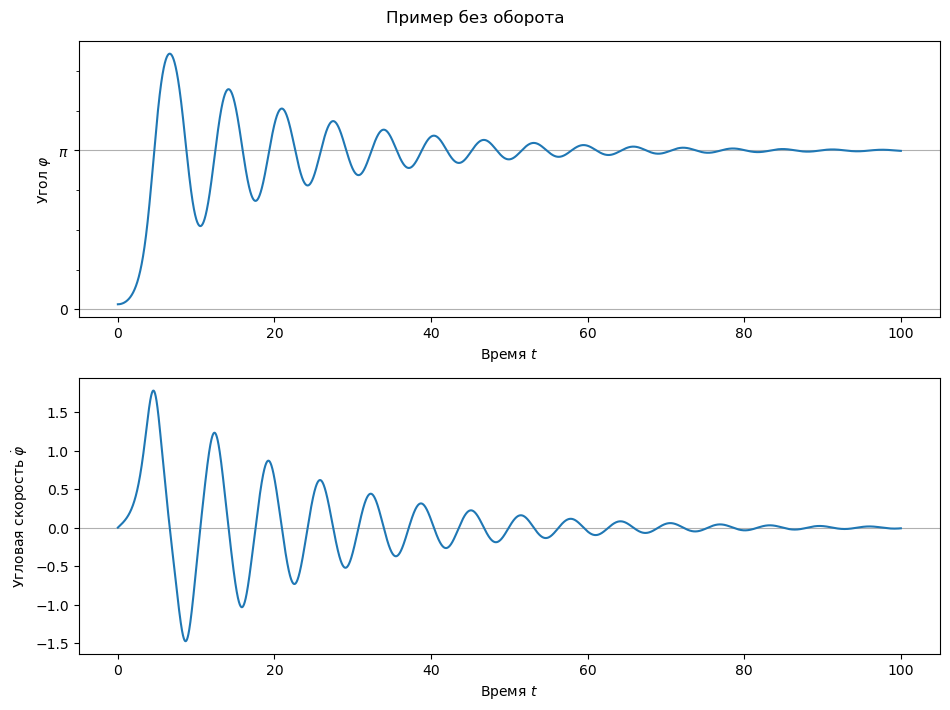

In [13]:
# Нулевое управление
c0 = LinearStateControl(2, 1)
# Численное интегрирование методом Рунге — Кутты
t, s = integrate(p1, c0, x0=[0.1, 0.], v0=empty(0), dt=0.01, T=100, N=1)

# Построение графиков решения
subplot(2, 1, 1) # Первая панель составного рисунка
axis_pi_ticks(gca().yaxis, pi, pi/4) # Расстановка рисок вертикальной оси
                                     # с периодичностью pi и pi/4
grid(axis='y') # Горизонтальная сетка
plot(t, s[:, 0]) # Построение зависимости угла от времени
xlabel(r'Время $t$') # Подпись по нижнему краю коробки осей
ylabel(r'Угол $\varphi$') # Подпись по левому краю коробки осей 

subplot(2, 1, 2) # Вторая панель составного рисунка
axhline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color']) # Горизонтальная ось на нулевом уровне
plot(t, s[:, 1])
xlabel(r'Время $t$')
ylabel(r'Угловая скорость $\dot\varphi$')
suptitle(r'Пример без оборота') # Общий заголовок рисунка
tight_layout(); # Корректировка расстояний между краями рисунка и осями панелей

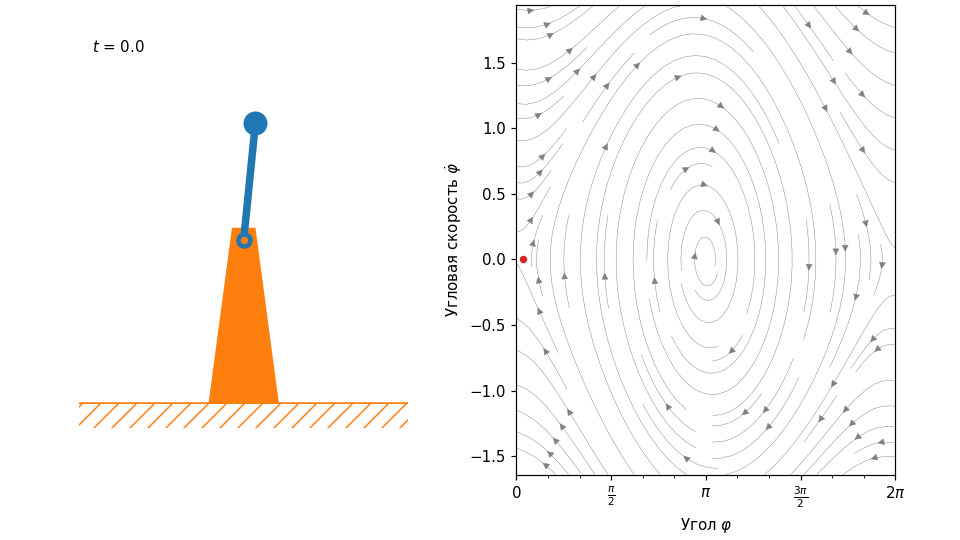

In [14]:
# Построение анимированного изображения gif
anim = animate_pendulum(t, s, phi_lims=(0, 2*pi), phase_portrait=[p1, c0],
                        spacing=30, invsec=1, filename='temp/test2.gif')
Image('temp/test2.gif')

# Раскомментируйте для построения видео mp4 (ffmpeg должен быть установлен)
#anim = animate_pendulum(t, s, phi_lims=(0, 2*pi), phase_portrait=[p1, c0],
#                        spacing=30, invsec=1, filename='temp/test2.mp4')
#Video('temp/test2.mp4')

# Раскомментируйте для создания анимации на JavaScript
#anim = animate_pendulum(t, s, phi_lims=(0, 2*pi), phase_portrait=[p1, c0],
#                        spacing=30, invsec=1)
#HTML(anim.to_jshtml())

## Решение

### 2.1. Пример с маятником, совершающим один полный оборот

In [17]:
# Вставьте и запустите код для построения графиков временной реализации

In [18]:
# Вставьте и запустите код для построения анимации

### 2.2. Пример с маятником, совершающим два полных оборота

In [20]:
# Вставьте и запустите код для построения графиков временной реализации

In [21]:
# Вставьте и запустите код для построения анимации

### 2.3. Пример с маятником, совершающим пять полных оборотов

In [23]:
# Вставьте и запустите код для построения графиков временной реализации

In [24]:
# Вставьте и запустите код для построения анимации

### 2.4. Пример с маятником, совершающим один оборот из горизонтального положения

In [26]:
# Вставьте и запустите код для построения графиков временной реализации

In [27]:
# Вставьте и запустите код для построения анимации

# Задание 3. Линеаризация и линейное управление по состоянию
<a id="sec:pr3"></a>

Изучение линейных регуляторов для рассматриваемой системы начинается с линеаризации уравнений&nbsp;[$(4)$](description.ipynb#eq:phi) и [$(8)$](description.ipynb#eq:phi-cos) вблизи $\varphi = 0$. Как было сказано в разделе [2.5](description.ipynb#sec2.5)
описания работы, линеаризация обоих уравнений совпадает,
$$
\ddot\varphi + \nu\dot\varphi - \Omega^2 \varphi = -u.
$$
Линейная стратегия управления по состоянию имеет вид $u = k_0 \varphi + k_1 \dot\varphi$. Подстановка этой в стратегии в линеаризованное уравнение приводит к линейному однородному обыкновенному дифференциальному уравнению второго порядка с постоянными коэффициентами, которое записывается как
$$
\ddot\varphi + (\nu + k_1)\dot\varphi + (k_0 - \Omega^2) \varphi = 0.
$$
Как известно, состояние равновесия этого уравнения грубо устойчиво, если все коэффициенты (включая коэффициент при старшей производной) одного знака. Таким образом, верхнее положение равновесия в замкнутой системе устойчиво, если $\nu + k_1 > 0$ и $k_0 - \Omega^2 > 0$, то есть $k_1 > -\nu$ и $k_0 > \Omega^2$. При этих условиях уравнение замкнутой системы является уравнением гармонического осциллятора с затуханием. При этом точка $(\varphi, \dot\varphi) = (0, 0)$ может быть устойчивым фокусом либо устойчивым узлом. В первом случае процесс установления происходит с переколебаниями (квазигармонически) и значение $\varphi$ бесконечное число раз обращается в $0$, а во-втором чисто ангармонически и значение $\varphi$ обращается в $0$ не более одного раза. *Запишете аналитические условия, при которых в процессе установления происходит бесконечное число переколебаний, и при которых&nbsp;— конечное. Постройте карты областей в плоскости $(k_0, k_1)$ для маятника `p1`, в которых верхнее положения соответствует устойчивому узлу, устойчивому фокусу или неусточивому равновесию. Для случая управления только по углу ($k_1 = 0$) определите численно интервал значений коэффициента $k_0$, где верхнее положение является устойчивым узлом.*

## Пример построения карты устойчивости для уравнения $\ddot x + a \dot x + b x = 0$ 

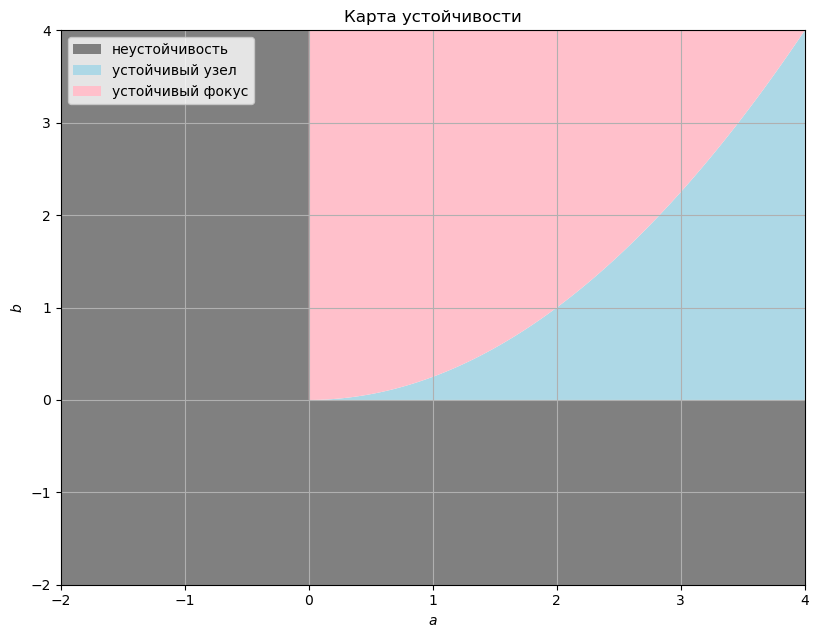

In [31]:
# Определение границ коробки осей
a_min = -2
a_max = 4
b_min = -2
b_max = 4

# Функция fill_between используется для закраски области между двумя кривыми,
# заданными посредством общего набора абсцисс и двумя наборами соответствующих
# этим абсциссам ординат
unstable = fill_between([a_min, 0, 0, a_max], [b_min, b_min, b_min, b_min],
                        [b_max, b_max, 0, 0], fc='grey', label='неустойчивость')

a = linspace(0, a_max, 201) # Эквидистантный массив от 0 до a_max из 101 точки
node = fill_between(a, 0, a**2/4, fc='lightblue', label='устойчивый узел')
focus = fill_between(a, a**2/4, b_max, fc='pink', label='устойчивый фокус')

# Установка границ коробки осей
axis([a_min, a_max, b_min, b_max])

xlabel('$a$')
ylabel('$b$')

# Легенда карты
legend(loc='upper left')

grid()
title(r'Карта устойчивости');

## Решение

### 3.1. Аналитические условия для устойчивых узла и фокуса

*Запишите аналитические условия здесь.*

### 3.2. Карта областей устойчивости и неустойчивости

In [36]:
# Вставьте и запустите код для построения карты устойчивости

### 3.3. Интервал значений $k_0$ для устойчивого узла при $k_1 = 0$

In [38]:
# Замените 50 и 51 на код для границ интервала и запустите ячейку
print('Интервал значений k_0: ({0:.7g}, {1:.7g})'
      .format(50, 51))

Интервал значений k_0: (50, 51)
